# Home Exercise on Logistic Regression

## Task Description

Implement a **logistic regression** model using **gradient descent, Adam, or any other optimization method** to optimize the parameters.

- You are **only allowed** to use **computational libraries** such as **NumPy, Math, etc.** for implementing the **model and training process**.
- You **must not** use machine learning libraries or frameworks like **scikit-learn, TensorFlow, PyTorch, etc.** that provide pre-built models.
- For other tasks (e.g., data processing, visualization), you are free to use **any library**.

After implementing the model, use it to solve the following problem:  
[**Titanic - Machine Learning from Disaster**](https://www.kaggle.com/competitions/titanic/)

---

## Submission Guidelines

- Submit **only one Jupyter Notebook** file that:
  1. **Handles all tasks**, including **data downloading, preprocessing, model training** and **evaluation**.
  2. **Generates a CSV** result file.
  3. **Includes an image** of the submission results on Kaggle.

- **Important**:
  - **Submissions not following the guidelines will receive a score of 0.**
  - The model’s **accuracy must be at least 65%**, and the instructor will re-submit your result file to verify model integrity.

---

## Grading Criteria

For valid submissions, scores will be assigned based on the **leaderboard ranking** (**strictly greater**):

| Leaderboard Ranking | Score |
|---------------------|-------|
| **Top 25%**        | **10 points** |
| **25% - 50%**      | **9.0 points** |
| **50% - 75%**      | **8.0 points** |
| **75% - 100%**     | **7.0 points** |


You can view my running notebook here (if at the time i submit this to you that i remember to public that notebook :>)

https://www.kaggle.com/code/zphudzz/lab06-logreg

Image of the submission at the link: 

https://drive.google.com/uc?id=1AZC8U_zA4AszFLd6YweogpHCOsVxRF0W

https://drive.google.com/uc?id=1DeenPaqARP94eBJRMnV9-g-TVPGfjXjo


# Leaderboard Standing on 20/02/2025

Note: you may need to restart the kernel to use updated packages.


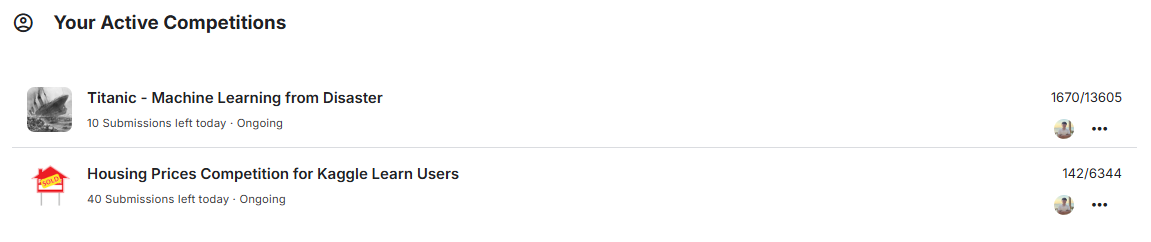

In [1]:
%pip install pillow requests


from IPython.display import display
from PIL import Image
import requests
from io import BytesIO

# Google Drive direct link
image_url = "https://drive.google.com/uc?id=15iu3hZfE-ORw4Ljbcp846kQJt4xvFHt3"

# Fetch image
response = requests.get(image_url)
img = Image.open(BytesIO(response.content))

# Display image
display(img)


# Download and Import

In [1]:
%pip install gdown pandas numpy matplotlib scikit-learn tqdm

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install --upgrade seaborn matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 74.4 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.5
    Uninstalling matplotlib-3.7.5:
      Successfully uninstalled matplotlib-3.7.5
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mlxtend 0.23.3 requires scikit-learn>=1.3.1, but you have scikit-learn 1.2.2 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import gdown
import zipfile
import sys
import os
import platform
import re
from tqdm import tqdm
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import (
    MaxAbsScaler,
    MinMaxScaler,
    Normalizer,
    PowerTransformer,
    QuantileTransformer,
    RobustScaler,
    StandardScaler,
    minmax_scale,
)
from itertools import product
from statistics import mode


In [4]:
# Python environment details
print("Python executable being used:", sys.executable)
print("Python version:", sys.version)

# Operating System details
print("Operating System:", platform.system())
print("OS Version:", platform.version())
print("OS Release:", platform.release())

# Machine and architecture details
print("Machine:", platform.machine())

# Visual Studio Code details (based on environment variable)
vscode_info = os.environ.get('VSCODE_PID', None)
if vscode_info:
    print("Running in Visual Studio Code")
else:
    print("Not running in Visual Studio Code")

Python executable being used: /usr/bin/python3
Python version: 3.10.12 (main, Nov  6 2024, 20:22:13) [GCC 11.4.0]
Operating System: Linux
OS Version: #1 SMP PREEMPT_DYNAMIC Sun Nov 10 10:07:59 UTC 2024
OS Release: 6.6.56+
Machine: x86_64
Not running in Visual Studio Code


In [5]:
if not vscode_info:
    for dirname, _, filenames in os.walk('/kaggle/input'):
        for filename in filenames:
            print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [6]:
# https://drive.google.com/file/d/1gr9APKWqecYL7eTG-lu5Atd0Kh_VLvMA/view?usp=sharing
if vscode_info:
    # Define the destination directory
    output_dir = "Data2"  # Change this to your desired directory

    # Ensure the directory exists
    os.makedirs(output_dir, exist_ok=True)

    # Download the file
    url = "https://drive.google.com/uc?id=1gr9APKWqecYL7eTG-lu5Atd0Kh_VLvMA"
    output_zip = "titanic.zip"
    gdown.download(url, output_zip, quiet=False)

    # Extract all contents to the specified directory
    with zipfile.ZipFile(output_zip, "r") as zip_ref:
        zip_ref.extractall(output_dir)

    print(f"Files extracted to: {output_dir}")

In [7]:
# Load Titanic dataset from Kaggle
# https://drive.google.com/file/d/1gr9APKWqecYL7eTG-lu5Atd0Kh_VLvMA/view?usp=sharing
if vscode_info:
    train_data_path = "Data2/train.csv"  
    test_data_path = "Data2/test.csv"
else:
    train_data_path = "/kaggle/input/titanic/train.csv"
    test_data_path = "/kaggle/input/titanic/test.csv"
    

train = pd.read_csv(train_data_path)

test = pd.read_csv(test_data_path)

target = train.Survived

print("✅ Dataset loaded successfully!")
print("📊 First few rows of the dataset:")
train.head()


✅ Dataset loaded successfully!
📊 First few rows of the dataset:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# EDA

In [8]:
print(f'Unique Values in Pclass :{train.Pclass.unique()}')

Unique Values in Pclass :[3 1 2]


In [9]:
print(f'Unique Values in SibSp :{train.SibSp.unique()}')

Unique Values in SibSp :[1 0 3 4 2 5 8]


nan found!

In [10]:
print(f'Unique Values in Embarked :{train.Embarked.unique()}')

Unique Values in Embarked :['S' 'C' 'Q' nan]


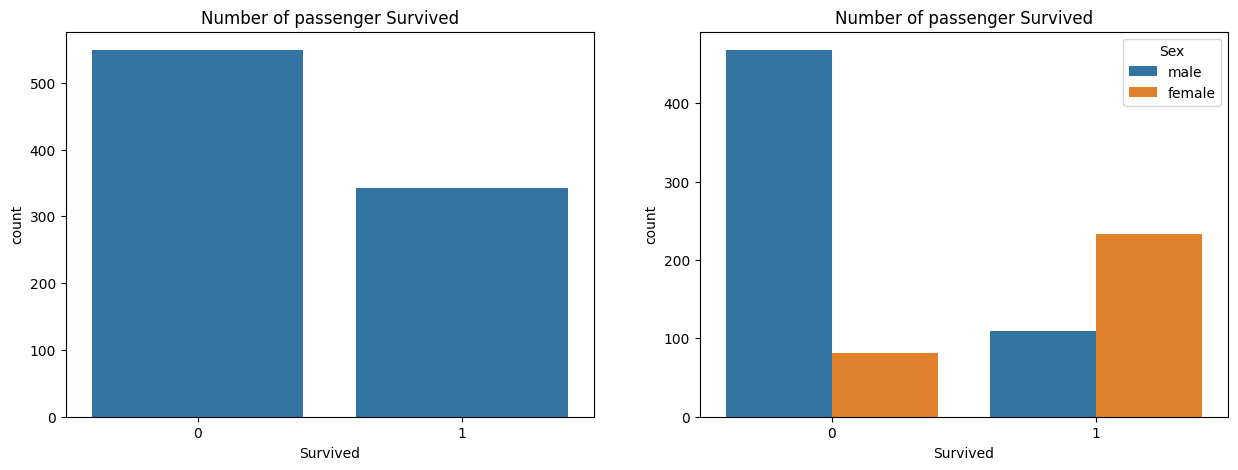

In [11]:
plt.figure(figsize=(15,5))

# First subplot
plt.subplot(1,2,1)
sns.countplot(x=train["Survived"])  # Explicitly using x=
plt.title('Number of passenger Survived')

# Second subplot
plt.subplot(1,2,2)
sns.countplot(x="Survived", hue="Sex", data=train)
plt.title('Number of passenger Survived')

plt.show()

more number of non-survived people and females are more likely to survived than male!. so, 'Sex' looks like a very strong explanatory variable, and it can be good choice for our model!

Now see null value in the train set

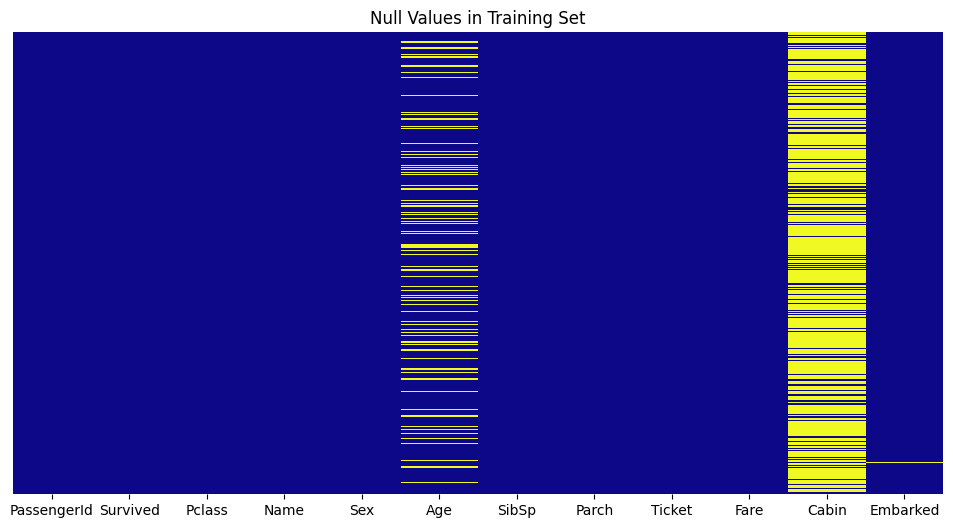

In [12]:
plt.figure(figsize=(12,6))
sns.heatmap(train.isnull(), yticklabels=False, cmap='plasma', cbar=False)
plt.title('Null Values in Training Set')
plt.show()


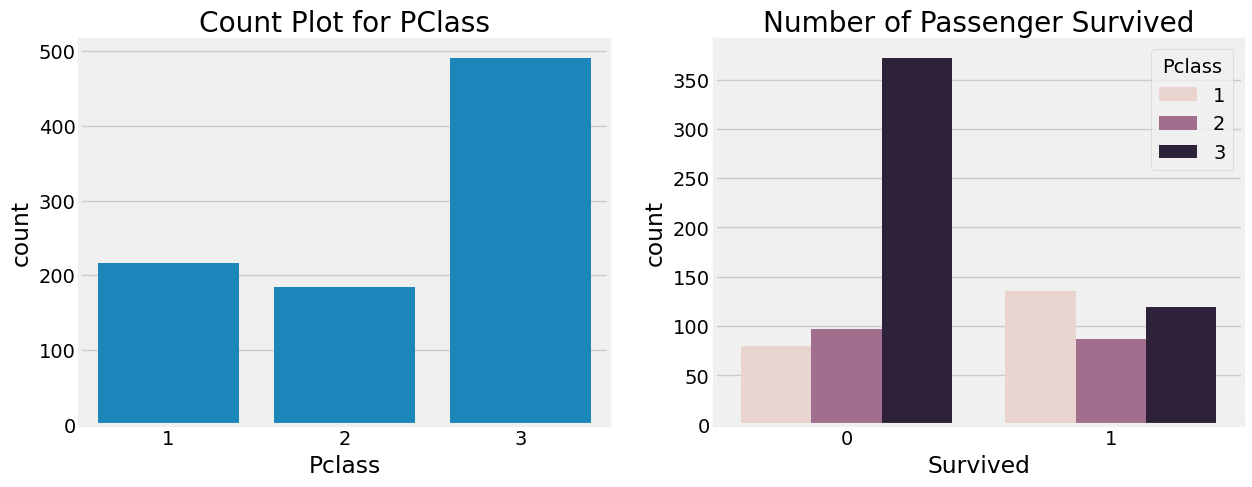

In [13]:
plt.figure(figsize=(15,5))
plt.style.use('fivethirtyeight')

# First subplot: Count Plot for PClass
plt.subplot(1,2,1)
sns.countplot(x="Pclass", data=train)  
plt.title('Count Plot for PClass')

# Second subplot: Survival Count by PClass
plt.subplot(1,2,2)
sns.countplot(x="Survived", hue="Pclass", data=train)
plt.title('Number of Passenger Survived')

plt.show()


<Axes: ylabel='Frequency'>

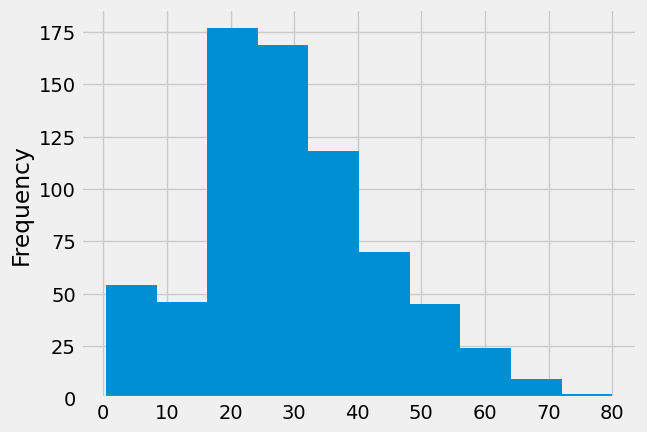

In [14]:
train['Age'].plot(kind='hist')

Text(0.5, 1.0, 'Age Distribution')

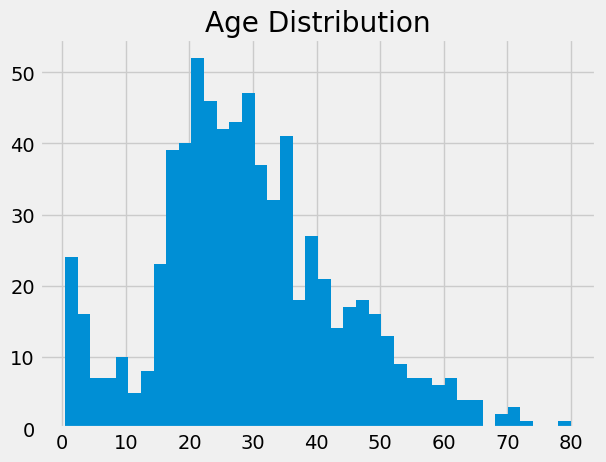

In [15]:
train['Age'].hist(bins=40)
plt.title('Age Distribution')

single person Non-survived count is almost double than survived, while others have 50-50 % ratio

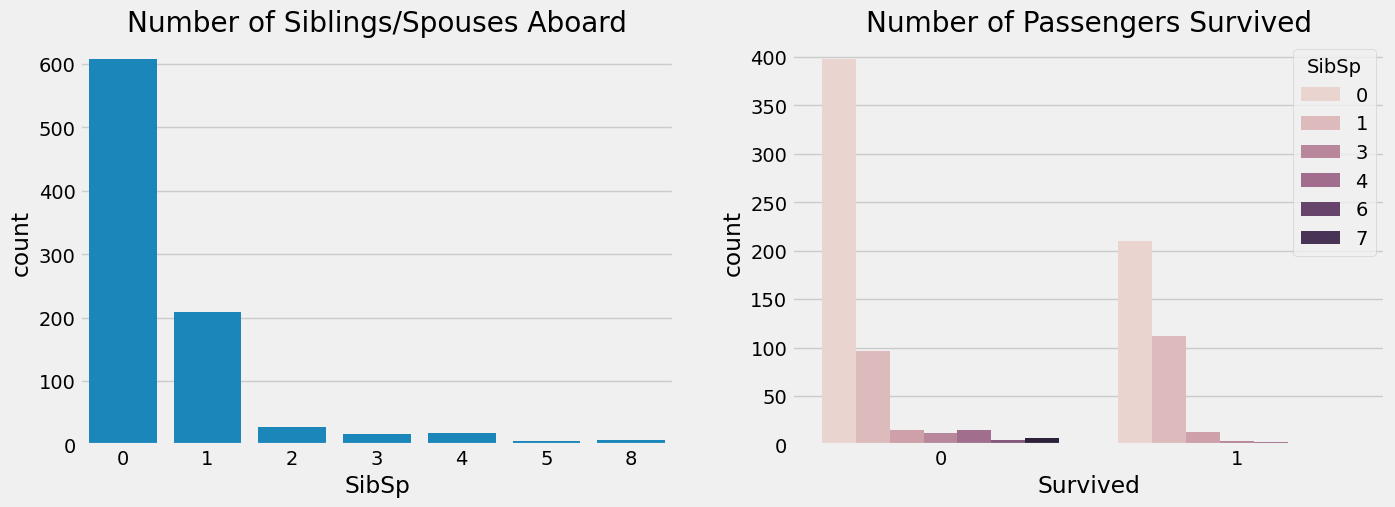

In [16]:
plt.figure(figsize=(15,5))

# First subplot: Count Plot for SibSp
plt.subplot(1,2,1)
sns.countplot(x="SibSp", data=train)  
plt.title('Number of Siblings/Spouses Aboard')

# Second subplot: Survival Count by SibSp
plt.subplot(1,2,2)
sns.countplot(x="Survived", hue="SibSp", data=train)
plt.legend(title="SibSp", loc='upper right')  
plt.title('Number of Passengers Survived')

plt.show()


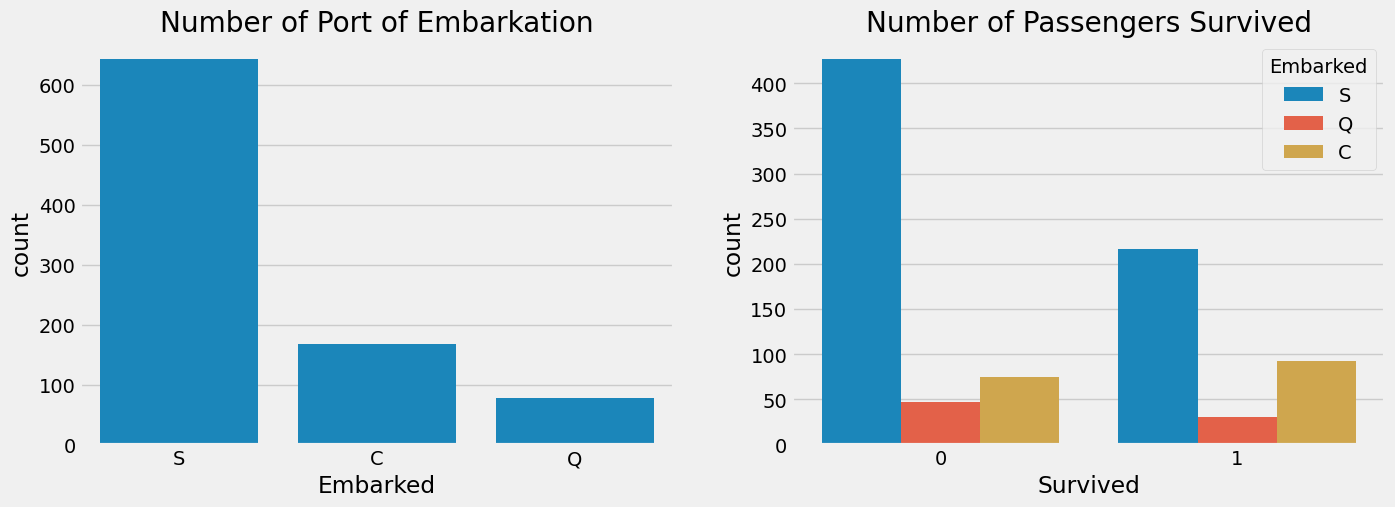

In [17]:
plt.figure(figsize=(15,5))

# First subplot: Count Plot for Embarked
plt.subplot(1,2,1)
sns.countplot(x="Embarked", data=train)  
plt.title('Number of Port of Embarkation')

# Second subplot: Survival Count by Embarked
plt.subplot(1,2,2)
sns.countplot(x="Survived", hue="Embarked", data=train)
plt.legend(title="Embarked", loc='upper right')  
plt.title('Number of Passengers Survived')

plt.show()


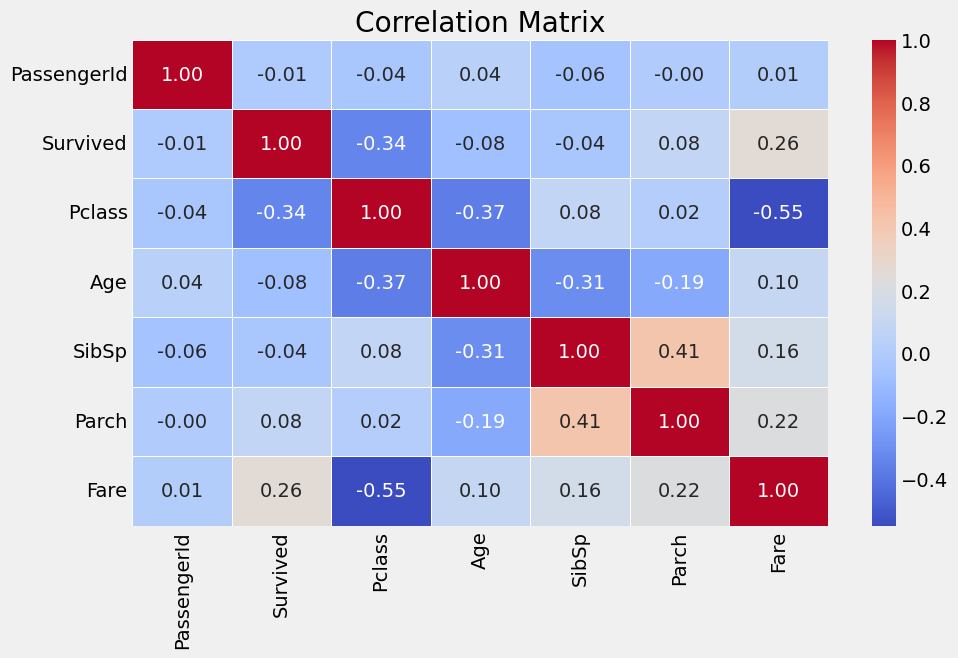

In [18]:
numeric_train = train.select_dtypes(include=['number'])

plt.figure(figsize=(10,6))
sns.heatmap(numeric_train.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')

plt.show()

Pclass and age, as they had max relation in the entire set we are going to replace missing age values with median age calculated per class

In [19]:
train.loc[train.Age.isnull(), 'Age'] = train.groupby("Pclass").Age.transform('median')


#Same thing for test set
test.loc[test.Age.isnull(), 'Age'] = test.groupby("Pclass").Age.transform('median')

In [20]:
train.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

As maximum values in train set is S let's replace it with the null values

In [21]:
train['Embarked'] = train['Embarked'].fillna(mode(train['Embarked']))
test['Embarked'] = test['Embarked'].fillna(mode(test['Embarked']))

Also, corr(Fare, Pclass) is the highest correlation in absolute numbers for 'Fare', so we'll use Pclass again to impute the missing values!

In [22]:
train['Fare']  = train.groupby("Pclass")['Fare'].transform(lambda x: x.fillna(x.median()))
test['Fare']  = test.groupby("Pclass")['Fare'].transform(lambda x: x.fillna(x.median()))

In [23]:
train.Cabin.value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [24]:
train['Cabin'] = train['Cabin'].fillna('U')
test['Cabin'] = test['Cabin'].fillna('U')

# Preprocessing

Sex is categorical data so we can replace male to 0 and femail to 1

In [25]:
train.Sex.unique()

array(['male', 'female'], dtype=object)

In [26]:
# Convert 'Sex' column to numeric values using .loc[]
train.loc[train['Sex'] == 'male', 'Sex'] = 0
train.loc[train['Sex'] == 'female', 'Sex'] = 1

test.loc[test['Sex'] == 'male', 'Sex'] = 0
test.loc[test['Sex'] == 'female', 'Sex'] = 1


In [27]:
train.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

Let's encode with OneHotEncoder technique

In [28]:
encoder = OneHotEncoder()
temp = pd.DataFrame(encoder.fit_transform(train[['Embarked']]).toarray(), columns=['S', 'C', 'Q'])
train = train.join(temp)
train.drop(columns='Embarked', inplace=True)

temp = pd.DataFrame(encoder.transform(test[['Embarked']]).toarray(), columns=['S', 'C', 'Q'])
test = test.join(temp)
test.drop(columns='Embarked', inplace=True)

In [29]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'S', 'C', 'Q'],
      dtype='object')

In [30]:
train.Cabin.tolist()[0:20]

['U',
 'C85',
 'U',
 'C123',
 'U',
 'U',
 'E46',
 'U',
 'U',
 'U',
 'G6',
 'C103',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U']

In [31]:
train['Cabin'] = train['Cabin'].map(lambda x:re.compile("([a-zA-Z])").search(x).group())
test['Cabin'] = test['Cabin'].map(lambda x:re.compile("([a-zA-Z])").search(x).group())
train.Cabin.unique()

array(['U', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [32]:
cabin_category = {'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7, 'T':8, 'U':9}
train['Cabin'] = train['Cabin'].map(cabin_category)
test['Cabin'] = test['Cabin'].map(cabin_category)

What is in the name?
Each passenger Name value contains the title of the passenger which we can extract and discover. To create new variable "Title":

- I am using method 'split' by comma to divide Name in two parts and save the second part
- I am splitting saved part by dot and save first part of the result
- To remove spaces around the title I am using 'split' method
- To visualize, how many passengers hold each title, I chose countplot.

In [33]:
train.Name

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [34]:
train['Name'] = train.Name.str.extract(r' ([A-Za-z]+)\.', expand = False)
test['Name'] = test.Name.str.extract(r' ([A-Za-z]+)\.', expand = False)

In [35]:
train['Name'].unique().tolist()

['Mr',
 'Mrs',
 'Miss',
 'Master',
 'Don',
 'Rev',
 'Dr',
 'Mme',
 'Ms',
 'Major',
 'Lady',
 'Sir',
 'Mlle',
 'Col',
 'Capt',
 'Countess',
 'Jonkheer']

In [36]:
train.rename(columns={'Name' : 'Title'}, inplace=True)
train['Title'] = train['Title'].replace(['Rev', 'Dr', 'Col', 'Ms', 'Mlle', 'Major', 'Countess', 
                                       'Capt', 'Dona', 'Jonkheer', 'Lady', 'Sir', 'Mme', 'Don'], 'Other')
                                      
test.rename(columns={'Name' : 'Title'}, inplace=True)
test['Title'] = test['Title'].replace(['Rev', 'Dr', 'Col', 'Ms', 'Mlle', 'Major', 'Countess', 
                                       'Capt', 'Dona', 'Jonkheer', 'Lady', 'Sir', 'Mme', 'Don'], 'Other')

In [37]:
train['Title'].value_counts(normalize = True) * 100

Title
Mr        58.024691
Miss      20.426487
Mrs       14.029181
Master     4.489338
Other      3.030303
Name: proportion, dtype: float64

In [38]:
encoder = OneHotEncoder()
temp = pd.DataFrame(encoder.fit_transform(train[['Title']]).toarray())
train = train.join(temp)
train.drop(columns='Title', inplace=True)

temp = pd.DataFrame(encoder.transform(test[['Title']]).toarray())
test = test.join(temp)
test.drop(columns='Title', inplace=True)

we know from part 2 that Sibsp is the number of siblings / spouses aboard the Titanic, and Parch is the number of parents / children aboard the Titanic... So, what is another straightforward feature to engineer? Yes, it is the size of each family aboard!

In [39]:
train['familySize'] = train['SibSp'] + train['Parch'] + 1
test['familySize'] = test['SibSp'] + test['Parch'] + 1

In [40]:
# Drop redundant features
train = train.drop(['SibSp', 'Parch', 'Ticket'], axis = 1)
test = test.drop(['SibSp', 'Parch', 'Ticket'], axis = 1)

In [41]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,S,C,Q,0,1,2,3,4,familySize
0,1,0,3,0,22.0,7.2500,9,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2
1,2,1,1,1,38.0,71.2833,3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2
2,3,1,3,1,26.0,7.9250,9,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1
3,4,1,1,1,35.0,53.1000,3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2
4,5,0,3,0,35.0,8.0500,9,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1


# Building Funcs

## **Logistic Regression Using Gradient Descent (Python Implementation)**  

### **Overview**  
This implementation defines a **Logistic Regression** model trained using **Gradient Descent**. It supports different gradient descent variants:  
- **Batch Gradient Descent**  
- **Stochastic Gradient Descent (SGD)** *(not implemented but can be extended)*  
- **Mini-Batch Gradient Descent** *(not implemented but batch size is included for future use)*  

The model learns parameters ($\theta$) by minimizing the **logistic regression cost function** using iterative updates.

---

### **Loss / Cost Function**  
The **cost function (Log Loss)** for logistic regression is defined as:

$
J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log h_{\theta}(x^{(i)}) + (1 - y^{(i)}) \log (1 - h_{\theta}(x^{(i)})) \right]
$

where:
- $ h_{\theta}(x) = \sigma(X\theta) = \frac{1}{1 + e^{-X\theta}} $ (sigmoid function)
- $ m $ is the number of training samples.

---

### **Gradient Descent Update Rule**  
For each iteration, the model updates its parameters using:

$
\theta := \theta - \alpha \frac{1}{m} X^T (h - y)
$

where:
- $ \alpha $ is the **learning rate**.
- $ X $ is the **feature matrix**.
- $ h = \sigma(X\theta) $ is the **predicted probability**.
- $ y $ is the **true labels**.

---

### **Key Features**
✅ **Numerical Stability**: Prevents overflow issues by clipping large/small values.  
✅ **Gradient-Based Optimization**: Implements batch gradient descent.  
✅ **Training Loss Tracking**: Stores and retrieves the cost function values over iterations.  
✅ **Binary Classification**: Predicts class labels based on a threshold of **0.5**.



In [42]:
class LogisticRegressionGD:
    """
    Logistic Regression using Gradient Descent.

    Parameters:
    -----------
    learning_rate : float, default=0.01
        Step size for updating parameters.
    
    iterations : int, default=1000
        Number of optimization iterations.
    
    gradient_type : str, default="batch"
        Type of gradient descent: "batch", "stochastic", "mini-batch".
    
    batch_size : int, default=32
        Used only for mini-batch gradient descent.
    """

    def __init__(self, learning_rate=0.01, iterations=1000, gradient_type="batch", batch_size=32):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.gradient_type = gradient_type.lower()
        self.batch_size = batch_size
        self.theta = None
        self.training_loss = []
        self.epsilon = 1e-8  # To prevent log(0) issues

    def sigmoid(self, z):
        """Compute the sigmoid function with safety clipping to prevent overflow."""
        z = np.array(z, dtype=np.float64)  # Ensure correct dtype
        z = np.clip(z, -500, 500)  # Clip values to prevent overflow
        return 1 / (1 + np.exp(-z))

    def compute_cost(self, X, y):
        """Compute logistic regression cost function with numerical stability."""
        m = len(y)
        h = self.sigmoid(X @ self.theta)

        # Clip sigmoid output to avoid log(0) errors
        h = np.clip(h, self.epsilon, 1 - self.epsilon)

        cost = (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
        return cost

    def fit(self, X, y):
        """Train logistic regression using gradient descent."""
        print("\n🚀 Training Logistic Regression using Gradient Descent...")
        
        self.training_loss = []

        # Ensure X and y are numpy arrays of type float64
        X = np.array(X, dtype=np.float64)
        y = np.array(y, dtype=np.float64).reshape(-1, 1)  # Ensure y is (m,1)

        m, n = X.shape
        self.theta = np.zeros((n, 1), dtype=np.float64)  # Ensure theta is (n,1)

        for i in range(self.iterations):
            h = self.sigmoid(X @ self.theta)
            gradient = (1/m) * X.T @ (h - y)

            self.theta -= self.learning_rate * gradient

            # Compute and store loss
            cost = self.compute_cost(X, y)
            self.training_loss.append(cost)

        print("✅ Training Completed!")


    def predict(self, X):
        """Predict class labels (0 or 1) for new inputs."""
        return (self.sigmoid(X @ self.theta) >= 0.5).astype(int)
    
    def get_training_loss(self):
        """Returns the recorded training loss as a list of tuples (iteration, loss)."""
        return list(enumerate(self.training_loss))  # Returns [(iteration, loss), ...]



## **Logistic Regression with L2 Regularization (Python Implementation)**  

### **Overview**  
This implementation defines a **Logistic Regression** model with **L2 regularization** (also known as **Ridge Regression** in linear models). It is trained using **Gradient Descent** and helps prevent **overfitting** by penalizing large coefficients.  

The model optimizes the **logistic regression loss function** with an additional **L2 penalty term**, which controls the complexity of the model.

---

### **Loss / Cost Function with L2 Regularization**  
The cost function for logistic regression with L2 regularization is given by:

$
J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log h_{\theta}(x^{(i)}) + (1 - y^{(i)}) \log (1 - h_{\theta}(x^{(i)})) \right] + \frac{\lambda}{2m} \sum_{j=1}^{n} \theta_j^2
$

where:
- $ h_{\theta}(x) = \sigma(X\theta) = \frac{1}{1 + e^{-X\theta}} $ (sigmoid function)
- $ m $ is the number of training samples.
- $ \lambda $ is the **regularization strength**.
- The L2 penalty term $ \frac{\lambda}{2m} \sum_{j=1}^{n} \theta_j^2 $ **excludes** the bias term $ \theta_0 $.

---

### **Gradient Descent Update Rule (With L2 Regularization)**  
For each iteration, the model updates its parameters using:

$
\theta_j := \theta_j - \alpha \left[ \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)}) x_j^{(i)} + \frac{\lambda}{m} \theta_j \right]
$

where:
- $ \alpha $ is the **learning rate**.
- $ X $ is the **feature matrix**.
- $ h = \sigma(X\theta) $ is the **predicted probability**.
- $ y $ is the **true labels**.
- **Important:** The bias term $ \theta_0 $ is **not** penalized.

---

### **Key Features**
✅ **L2 Regularization (Ridge Penalty)**: Prevents large coefficients and reduces overfitting.  
✅ **Gradient-Based Optimization**: Implements batch gradient descent with L2 regularization.  
✅ **Training Loss Tracking**: Stores and retrieves cost function values over iterations.  
✅ **Binary Classification**: Uses **sigmoid activation** to predict probabilities and class labels.  

---

This model is suitable for **high-dimensional datasets** where **feature weights need to be controlled** to avoid overfitting. 🚀


In [43]:
class LogisticRegressionL2:
    """
    Logistic Regression with L2 Regularization using Gradient Descent.
    
    Parameters:
    -----------
    learning_rate : float, default=0.01
        Step size for updating parameters.
    
    iterations : int, default=1000
        Number of optimization iterations.
    
    lambda_reg : float, default=0.1
        L2 regularization strength (controls the penalty on large coefficients).
    """

    def __init__(self, learning_rate=0.01, iterations=1000, lambda_reg=0.1):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.lambda_reg = lambda_reg
        self.theta = None
        self.training_loss = []
        self.epsilon = 1e-8  # Prevents log(0) errors

    def sigmoid(self, z):
        """Compute the sigmoid function with safety clipping."""
        z = np.clip(z, -500, 500)  # Clip for numerical stability
        return 1 / (1 + np.exp(-z))

    def compute_cost(self, X, y):
        """Compute the logistic regression loss with L2 regularization."""
        m = len(y)
        h = self.sigmoid(X @ self.theta)

        h = np.clip(h, self.epsilon, 1 - self.epsilon)

        # Standard logistic regression loss
        loss = (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
        
        # L2 Regularization term (MAP estimation)
        reg_term = (self.lambda_reg / (2 * m)) * np.sum(self.theta[1:] ** 2)
        
        return loss + reg_term

    def fit(self, X, y):
        """Train logistic regression using gradient descent with L2 regularization."""
        print("\n🚀 Training Logistic Regression with L2 Regularization...")

        self.training_loss = []
        
        X = np.array(X, dtype=np.float64)
        y = np.array(y, dtype=np.float64).reshape(-1, 1)

        m, n = X.shape
        self.theta = np.zeros((n, 1), dtype=np.float64)

        for i in range(self.iterations):
            h = self.sigmoid(X @ self.theta)
            gradient = (1/m) * X.T @ (h - y)

            # Apply L2 regularization (excluding bias term θ₀)
            gradient[1:] += (self.lambda_reg / m) * self.theta[1:]

            self.theta -= self.learning_rate * gradient

            # Store loss
            cost = self.compute_cost(X, y)
            self.training_loss.append(cost)

        print("✅ Training Completed!")

    def predict(self, X):
        """Predict class labels (0 or 1)."""
        return (self.sigmoid(X @ self.theta) >= 0.5).astype(int)

    def get_training_loss(self):
        """Returns recorded training loss."""
        return list(enumerate(self.training_loss))


## **Logistic Regression Using Nesterov Accelerated Gradient (NAG)**  

### **Overview**  
This implementation defines a **Logistic Regression** model trained using **Nesterov Accelerated Gradient (NAG)**, an improved version of **Momentum-Based Gradient Descent**.  

NAG helps accelerate convergence by using a **lookahead step** before computing the gradient, which results in **faster optimization and reduced oscillations**.

---

### **Loss / Cost Function**  
The cost function for logistic regression remains the **log loss** (binary cross-entropy):

$
J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log h_{\theta}(x^{(i)}) + (1 - y^{(i)}) \log (1 - h_{\theta}(x^{(i)})) \right]
$

where:
- $ h_{\theta}(x) = \sigma(X\theta) = \frac{1}{1 + e^{-X\theta}} $ (sigmoid function)
- $ m $ is the number of training samples.

---

### **Nesterov Accelerated Gradient (NAG) Update Rule**  
Unlike standard gradient descent, NAG first **applies momentum to look ahead** and then computes the gradient at the projected future position:

1. Compute a **lookahead step**:
   $
   \tilde{\theta} = \theta - \mu v
   $
   where:
   - $ \mu $ is the **momentum** factor.
   - $ v $ is the **velocity (previous step update)**.

2. Compute gradient at **future position**:
   $
   g = \frac{1}{m} X^T (h_{\tilde{\theta}} - y)
   $

3. Update velocity:
   $
   v = \mu v + \alpha g
   $

4. Update parameters:
   $
   \theta = \theta - v
   $

where:
- $ \alpha $ is the **learning rate**.
- $ g $ is the **gradient at the lookahead position**.
- $ v $ stores the accumulated **momentum updates**.

---

### **Key Features**
✅ **Nesterov Accelerated Gradient (NAG)**: Reduces oscillations and speeds up convergence.  
✅ **Momentum-Based Optimization**: Keeps track of past updates to smooth optimization.  
✅ **Faster Training**: Outperforms standard gradient descent, especially on convex functions.  
✅ **Binary Classification**: Uses **sigmoid activation** for probability estimation and thresholding.  

---

This model is ideal for **faster convergence** in logistic regression problems and can be **extended to deep learning** optimizers like **NAG-SGD**. 🚀


In [44]:
class LogisticRegressionNAG:
    """
    Logistic Regression using Nesterov Accelerated Gradient (NAG).
    
    Parameters:
    -----------
    learning_rate : float, default=0.01
        Step size for parameter updates.
    
    iterations : int, default=1000
        Number of optimization iterations.
    
    momentum : float, default=0.9
        Momentum factor to speed up convergence.
    """

    def __init__(self, learning_rate=0.01, iterations=1000, momentum=0.9):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.momentum = momentum
        self.theta = None
        self.velocity = None
        self.training_loss = []
        self.epsilon = 1e-8  # Prevents log(0) issues

    def sigmoid(self, z):
        """Compute the sigmoid function with safety clipping."""
        z = np.clip(z, -500, 500)
        return 1 / (1 + np.exp(-z))

    def compute_cost(self, X, y):
        """Compute logistic regression loss."""
        m = len(y)
        h = self.sigmoid(X @ self.theta)

        h = np.clip(h, self.epsilon, 1 - self.epsilon)
        cost = (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
        return cost

    def fit(self, X, y):
        """Train logistic regression using Nesterov Accelerated Gradient (NAG)."""
        print("\n🚀 Training Logistic Regression with Nesterov Accelerated Gradient...")
        self.training_loss = []
        
        X = np.array(X, dtype=np.float64)
        y = np.array(y, dtype=np.float64).reshape(-1, 1)

        m, n = X.shape
        self.theta = np.zeros((n, 1), dtype=np.float64)
        self.velocity = np.zeros((n, 1), dtype=np.float64)

        for i in range(self.iterations):
            # Lookahead step: Compute gradients at a future position
            future_theta = self.theta - self.momentum * self.velocity
            h_future = self.sigmoid(X @ future_theta)
            gradient = (1/m) * X.T @ (h_future - y)

            # Update velocity and theta
            self.velocity = self.momentum * self.velocity + self.learning_rate * gradient
            self.theta -= self.velocity

            # Store loss
            cost = self.compute_cost(X, y)
            self.training_loss.append(cost)

        print("✅ Training Completed!")

    def predict(self, X):
        """Predict class labels (0 or 1)."""
        return (self.sigmoid(X @ self.theta) >= 0.5).astype(int)

    def get_training_loss(self):
        """Returns recorded training loss."""
        return list(enumerate(self.training_loss))


# Training

In [45]:
def manual_hyperparameter_tuning(models, param_grid, X_train, y_train, X_val, y_val):
    """
    Performs hyperparameter tuning by iterating through a set of predefined parameter values.

    Parameters:
    -----------
    models : dict
        Dictionary containing model constructors.

    param_grid : dict
        Dictionary containing hyperparameter values to test, in the form:
        { "model_name": { "param_name": [values...] } }.

    X_train : np.ndarray
        Training feature matrix.

    y_train : np.ndarray
        Training target values.

    X_val : np.ndarray
        Validation feature matrix.

    y_val : np.ndarray
        Validation target values.

    Returns:
    --------
    best_models : dict
        Dictionary containing the best model instance for each model type.

    results_df : pd.DataFrame
        DataFrame summarizing the hyperparameter tuning results.
    """
    best_models = {}
    results = []

    for model_name, model_class in models.items():
        best_mse = float("inf")
        best_params = None
        best_model = None

        # Extract hyperparameter names and values for this model
        param_names = list(param_grid[model_name].keys())
        param_values = list(param_grid[model_name].values())

        # Generate all combinations of hyperparameter values
        for param_combination in product(*param_values):
            params = dict(zip(param_names, param_combination))  # Convert tuple to dictionary

            # Create model with given hyperparameters
            model = model_class(**params)
            model.fit(X_train, y_train)

            # Predict on validation set
            y_pred_val = model.predict(X_val)

            # Compute mean squared error (MSE) manually
            mse = np.mean((y_val - y_pred_val.flatten()) ** 2)

            # Store the result
            results.append({
                "Model": model_name,
                "Params": params,
                "MSE": mse
            })

            # Update best model if it achieves lower MSE
            if mse < best_mse:
                best_mse = mse
                best_params = params
                best_model = model

        # Store the best model
        best_models[model_name] = best_model
        print(f"Best model for {model_name}: {best_params} - MSE: {best_mse}")

    # Convert results to DataFrame
    results_df = pd.DataFrame(results)
    
    return best_models, results_df



In [46]:
X_train, X_test, y_train, y_test = train_test_split(train.drop(['Survived', 'PassengerId'], axis=1), train['Survived'], test_size = 0.2, random_state=2)

In [47]:
X_train.head()

,Pclass,Sex,Age,Fare,Cabin,S,C,Q,0,1,2,3,4,familySize
30,1,0,40.0,27.7208,9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
10,3,1,4.0,16.7000,7,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,3
873,3,0,47.0,9.0000,9,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1
182,3,0,9.0,31.3875,9,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,7
876,3,0,20.0,9.8458,9,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1


In [48]:
# Convert all column names to strings
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

# Now apply MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [49]:
X_train = X_train_scaled
X_test = X_test_scaled

In [50]:
# scalers = {
#     "Unscaled Data": None,  # No transformation
#     "StandardScaler": StandardScaler(),
#     "MinMaxScaler": MinMaxScaler(),
#     "MaxAbsScaler": MaxAbsScaler(),
#     "RobustScaler": RobustScaler(quantile_range=(25, 75)),
#     "PowerTransformer (Yeo-Johnson)": PowerTransformer(method="yeo-johnson"),
#     "QuantileTransformer (Uniform)": QuantileTransformer(output_distribution="uniform", random_state=42),
#     "QuantileTransformer (Gaussian)": QuantileTransformer(output_distribution="normal", random_state=42),
#     "Normalizer (L2)": Normalizer(),
# }

In [51]:
models = {
    "Gradient Descent": LogisticRegressionGD,
    "L2 Regularization": LogisticRegressionL2,
    "Nesterov Accelerated Gradient": LogisticRegressionNAG
}


In [52]:
param_grid = {
    "Gradient Descent": {
        "learning_rate": [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1],
        "iterations": [5000, 10000],
    },
    "L2 Regularization": {
        "learning_rate": [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1],
        "iterations": [5000, 10000],
        "lambda_reg": [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]
    },
    "Nesterov Accelerated Gradient": {
        "learning_rate": [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1],
        "iterations": [5000, 10000],
        "momentum": [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.9, 0.99]
    }
}


In [53]:
# best_models, results_df = manual_hyperparameter_tuning(models, param_grid, X_train, y_train, X_test, y_test)
best_models, results_df = manual_hyperparameter_tuning(models, param_grid, X_train, y_train, X_test, y_test)




🚀 Training Logistic Regression using Gradient Descent...
✅ Training Completed!

🚀 Training Logistic Regression using Gradient Descent...
✅ Training Completed!

🚀 Training Logistic Regression using Gradient Descent...
✅ Training Completed!

🚀 Training Logistic Regression using Gradient Descent...
✅ Training Completed!

🚀 Training Logistic Regression using Gradient Descent...
✅ Training Completed!

🚀 Training Logistic Regression using Gradient Descent...
✅ Training Completed!

🚀 Training Logistic Regression using Gradient Descent...
✅ Training Completed!

🚀 Training Logistic Regression using Gradient Descent...
✅ Training Completed!

🚀 Training Logistic Regression using Gradient Descent...
✅ Training Completed!

🚀 Training Logistic Regression using Gradient Descent...
✅ Training Completed!

🚀 Training Logistic Regression using Gradient Descent...
✅ Training Completed!

🚀 Training Logistic Regression using Gradient Descent...
✅ Training Completed!

🚀 Training Logistic Regression using Gr

In [54]:
training_losses = {}
predictions = {}

for name, model in best_models.items():
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    predictions[name] = y_pred_train
    training_losses[name] = model.get_training_loss()

# training_losses = {}
# predictions = {}

# for (model_name, scaler_name), (model, scaler) in best_models.items():
#     # Apply the best scaler to training data
#     if scaler is not None:
#         X_train_scaled = scaler.fit_transform(X_train)
#     else:
#         X_train_scaled = X_train

#     # Train and predict
#     model.fit(X_train_scaled, y_train)
#     y_pred_train = model.predict(X_train_scaled)

#     predictions[(model_name, scaler_name)] = y_pred_train
#     training_losses[(model_name, scaler_name)] = model.get_training_loss()



🚀 Training Logistic Regression using Gradient Descent...
✅ Training Completed!

🚀 Training Logistic Regression with L2 Regularization...
✅ Training Completed!

🚀 Training Logistic Regression with Nesterov Accelerated Gradient...
✅ Training Completed!


In [55]:
# iterations, losses = zip(*model_gd.get_training_loss())

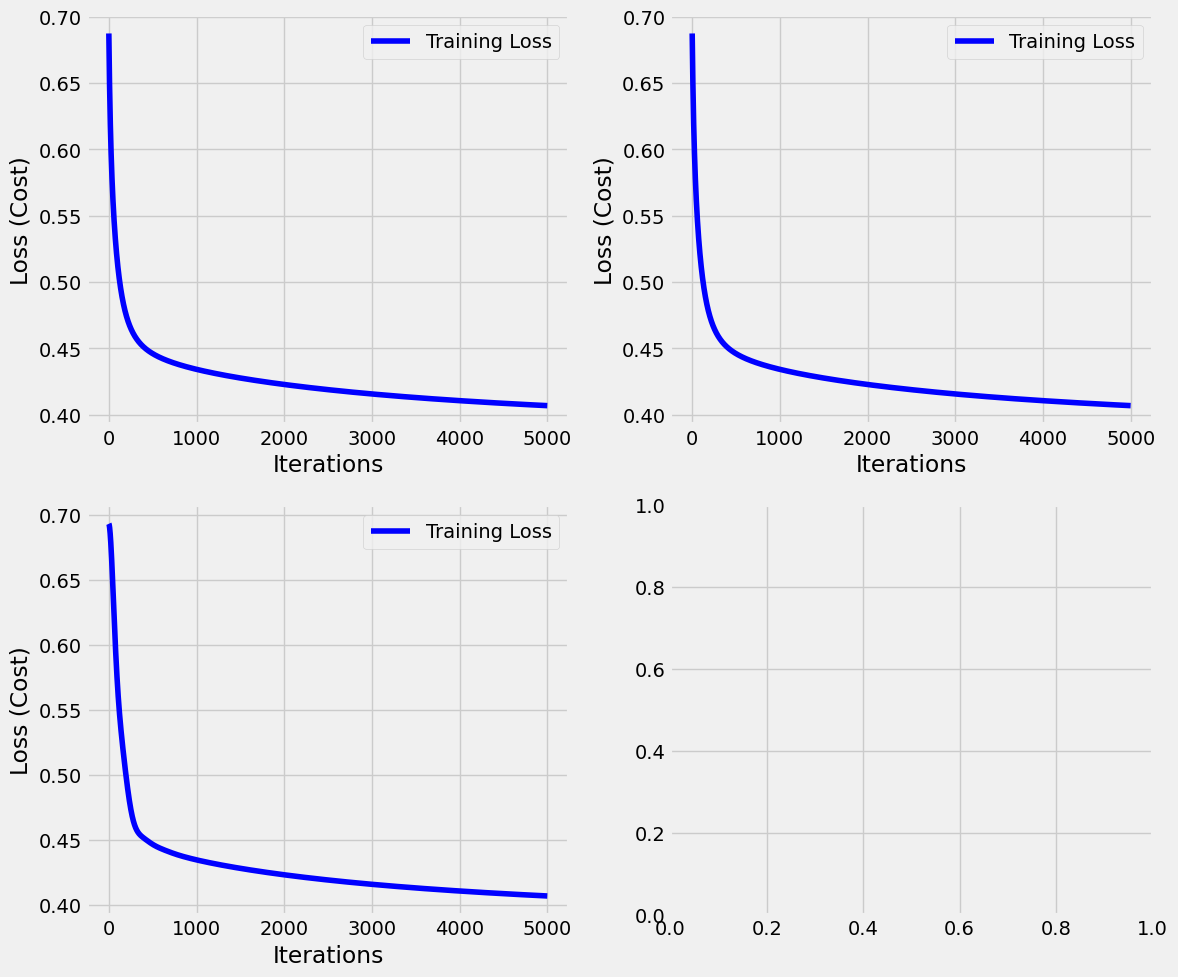

In [56]:
# ✅ Fix Training Loss Plot (First 50 Iterations)
# plt.figure(figsize=(16,5))
# plt.plot(iterations, losses, label='Training Loss', color='blue')

# plt.xlabel('Iteration')
# plt.ylabel('Loss')
# plt.title('Training Loss Over First 50 Iterations')
# plt.legend()
# plt.grid()
# plt.tight_layout()
# plt.show()

# Create subplots for training loss
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

for ax, (model_name, loss) in zip(axs.flatten(), training_losses.items()):
    iterations, loss_values = zip(*loss)  # ✅ Unpack (iteration, loss) tuples

    ax.plot(iterations, loss_values, label="Training Loss", color="blue")  # ✅ Correctly formatted loss values
    # ax.set_title(f"{model_name}-{scaler_name} - Training Loss")
    ax.set_xlabel("Iterations")
    ax.set_ylabel("Loss (Cost)")
    ax.legend()

plt.tight_layout()
plt.show()

# Predicting

In [57]:
def mean_squared_error_manual(y_true, y_pred):
    """
    Computes the Mean Squared Error (MSE) between actual and predicted values.
    """
    n = len(y_true)
    return np.sum((y_true - y_pred) ** 2) / n

def r2_score_manual(y_true, y_pred):
    """
    Computes the R² Score (Coefficient of Determination).
    """
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)  # Total sum of squares
    ss_residual = np.sum((y_true - y_pred) ** 2)  # Residual sum of squares
    return 1 - (ss_residual / ss_total)

def evaluate_manual(y_true, y_pred, model_name):
    """
    Evaluates the performance of a regression model using manual MSE and R².
    """
    mse = mean_squared_error_manual(y_true, y_pred)
    r2 = r2_score_manual(y_true, y_pred)
    print(f"{model_name} - MSE: {mse:.10f}, R² Score: {r2:.10f}")
    return mse, r2


In [58]:
# Train best models and store training losses
losses_test = {}
predictions_test = {}

for name, model in best_models.items():
    y_pred_test = model.predict(X_test)
    predictions_test[name] = y_pred_test
    losses_test[name] = model.get_training_loss()

results = {}
for model_name, predictions in predictions_test.items():
    mse, r2 = evaluate_manual(y_test, predictions.flatten(), model_name)
    results[model_name] = (mse, r2)

# Select the best model based on the highest R2 score (and lowest MSE in case of tie)
best_model = max(results, key=lambda x: (results[x][1], -results[x][0]))
print(f"\nBest Model Selected: {best_model}")

# # Store losses and predictions for the test set
# losses_test = {}
# predictions_test = {}

# # Iterate over the best models and their scalers
# for (model_name, scaler_name), (model, scaler) in best_models.items():
#     # Apply the correct scaler to the test set
#     if scaler is not None:
#         X_test_scaled = scaler.transform(X_test)
#     else:
#         X_test_scaled = X_test

#     # Predict using the best model
#     y_pred_test = model.predict(X_test_scaled)
#     predictions_test[(model_name, scaler_name)] = y_pred_test
#     losses_test[(model_name, scaler_name)] = model.get_training_loss()

# # Store results for each (model, scaler) combination
# results = {}

# for (model_name, scaler_name), predictions in predictions_test.items():
#     mse, r2 = evaluate_manual(y_test, predictions.flatten(), model_name)
#     results[(model_name, scaler_name)] = (mse, r2)

# # Select the best model and scaler based on R² (tie-breaker: lowest MSE)
# best_model, best_scaler = max(results, key=lambda x: (results[x][1], -results[x][0]))
# print(f"\n🏆 Best Model Selected: {best_model} with {best_scaler}")


Gradient Descent - MSE: 0.1955307263, R² Score: 0.2069620253
L2 Regularization - MSE: 0.1955307263, R² Score: 0.2069620253
Nesterov Accelerated Gradient - MSE: 0.1955307263, R² Score: 0.2069620253

Best Model Selected: Gradient Descent


In [59]:
len(X_test)

179

In [60]:
# len(predictions_test[best_model].flatten())

In [61]:
# mse, r2 = evaluate_manual(y_test, predictions_test[best_model].flatten(), best_model)

# Submit

In [62]:
# Convert all column names to strings
train.columns = train.columns.astype(str)
test.columns = test.columns.astype(str)

# Now apply MinMaxScaler
scaler = MinMaxScaler()

train_scale = scaler.fit_transform(train.drop(['Survived', 'PassengerId'], axis=1))
test_scale = scaler.transform(test.drop(['PassengerId'], axis = 1))

In [63]:
test['Survived'] = best_models[best_model].predict(test_scale)

In [64]:
# Prepare submission file
submission = pd.DataFrame({"PassengerId": test.PassengerId, "Survived": test.Survived})
submission.to_csv("submission.csv", index=False)
print("✅ Submission file generated: submission.csv")


✅ Submission file generated: submission.csv


In [65]:
# # Get the best model and its scaler
# best_model_name = str(best_model)
# best_scaler_name = str(best_scaler)
# best_model_instance, best_scaler = best_models[(best_model_name, best_scaler_name)]

# # ✅ Convert column names to strings (if not already)
# train.columns = train.columns.astype(str)
# test.columns = test.columns.astype(str)

# # ✅ Apply the correct scaler to the test set
# if best_scaler is not None:
#     test_scale = best_scaler.transform(test.drop(['PassengerId'], axis=1))
# else:
#     test_scale = test.drop(['PassengerId'], axis=1).values  # Keep as-is if no scaler used

# # ✅ Make predictions using the best model
# test['Survived'] = best_model_instance.predict(test_scale)

# # ✅ Evaluate the best model on `y_test`
# mse, r2 = evaluate_manual(y_test, predictions_test[(best_model_name, best_scaler_name)].flatten(), best_model)
# print(f"\n📊 Best Model Evaluation: {best_model} - MSE: {mse:.4f}, R²: {r2:.4f}")
# print(f"🔢 Number of Predictions: {len(predictions_test[(best_model_name, best_scaler_name)].flatten())}")

# # ✅ Prepare submission file
# submission = pd.DataFrame({"PassengerId": test.PassengerId, "Survived": test["Survived"]})
# submission.to_csv("submission.csv", index=False)
# print("✅ Submission file generated: submission.csv")


In [66]:
submission.head(10)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0
